<a id='input_validation'></a>
# Input Validation

## Objective

We will be examining monthly lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for 2018. The dataset includes five columns:  

|date|number_of_strikes|center_point_geom|longitude|latitude|
|---|---|---|---|---|  

The objective is to inspect the data and validate the quality of its contents. We will check for:
  
* Null values
* Missing dates
* A plausible range of daily lightning strikes in a location
* A geographical range that aligns with expectation

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px 
import seaborn as sns

In [15]:
df = pd.read_csv(r'C:\Users\saswa\Documents\GitHub\Python-For-Data-Analysis\Course-3\Data\Module_3\eda_input_validation_joining_dataset1.csv')

In [16]:
df.head()

,date,number_of_strikes,center_point_geom,longitude,latitude
0,2018-01-03,194,POINT(-75 27),-75.0,27.0
1,2018-01-03,41,POINT(-78.4 29),-78.4,29.0
2,2018-01-03,33,POINT(-73.9 27),-73.9,27.0
3,2018-01-03,38,POINT(-73.8 27),-73.8,27.0
4,2018-01-03,92,POINT(-79 28),-79.0,28.0


# Display the data types of the columns
print(df.dtypes)

The `date` column is currently a string. Let's parse it into a datetime column.

In [17]:
# Convert `date` column to datetime
df['date'] = pd.to_datetime(df['date'])

Now we'll do some data validation. We begin by counting the number of missing values in each column.

In [18]:
df.dtypes

date                 datetime64[ns]
number_of_strikes             int64
center_point_geom            object
longitude                   float64
latitude                    float64
dtype: object

In [19]:
df.isnull().sum()

date                 0
number_of_strikes    0
center_point_geom    0
longitude            0
latitude             0
dtype: int64

Check ranges for all variables.

In [20]:
df.describe(include = 'all')

,date,number_of_strikes,center_point_geom,longitude,latitude
count,3401012,3.401012e+06,3401012,3.401012e+06,3.401012e+06
unique,NaN,NaN,170855,NaN,NaN
top,NaN,NaN,POINT(-81.5 22.5),NaN,NaN
freq,NaN,NaN,108,NaN,NaN
mean,2018-07-13 03:32:02.018504960,1.311403e+01,NaN,-9.081778e+01,3.374688e+01
min,2018-01-01 00:00:00,1.000000e+00,NaN,-1.418000e+02,1.660000e+01
25%,2018-06-04 00:00:00,2.000000e+00,NaN,-1.008000e+02,2.760000e+01
50%,2018-07-18 00:00:00,4.000000e+00,NaN,-9.070000e+01,3.350000e+01
75%,2018-08-24 00:00:00,1.200000e+01,NaN,-8.130000e+01,3.970000e+01
max,2018-12-31 00:00:00,2.211000e+03,NaN,-4.320000e+01,5.170000e+01


Notice that the number of unique dates in the `date` column is 357. This means that eight days of 2018 are missing from the data, because 2018 had 365 days.

### Validate `date` column

We need a way to easily determine which dates are missing. We can do this by comparing all of the actual dates in 2018 to the dates we have in our `date` column. The function `pd.date_range()` will create a datetime index of all dates between a start and end date (inclusive) that we'll give as arguments. This is a very useful function that can be used for more than just days. For more information about `pd.date_range()`, refer to the [pandas date_range() function documentation](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html). 

Once we have the datetime index object of all dates in 2018, we'll compare its contents to the dates we have in the `date` column. The `index.difference()` method is used on index objects. Its argument is an index or array that you want to compare with the one the method is being applied to. It returns the set difference of the two indices&mdash;the values that are in the original index but not in the one given in the argument. 

In [21]:
# Create datetime index of every date in 2018
full_date_range = pd.date_range(start='2018-01-01', end='2018-12-31')

# Determine which values are in `full_date_range` but not in `df['date']`
full_date_range.difference(df['date'])

DatetimeIndex(['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', freq=None)

We knew that the data was missing eight dates, but now we know which specific dates they are. 

### Validate `number_of_strikes` column

Let's make a boxplot to better understand the range of values in the data.

<Axes: ylabel='number_of_strikes'>

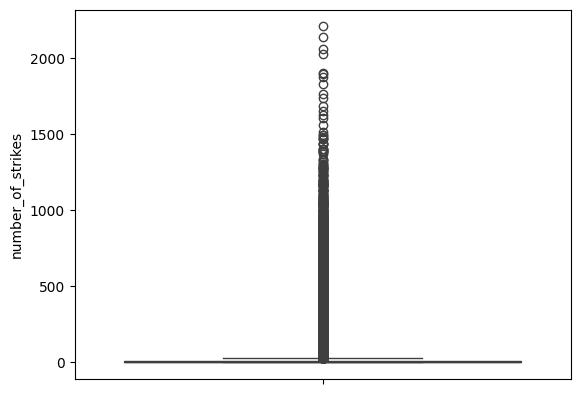

In [22]:
sns.boxplot(y = df['number_of_strikes'])

This is not a very useful visualization because the box of the interquartile range is squished at the very bottom. This is because the upper outliers are taking up all the space. Let's do it again, only this time we'll set `showfliers=False` so outliers are not included. 

<Axes: ylabel='number_of_strikes'>

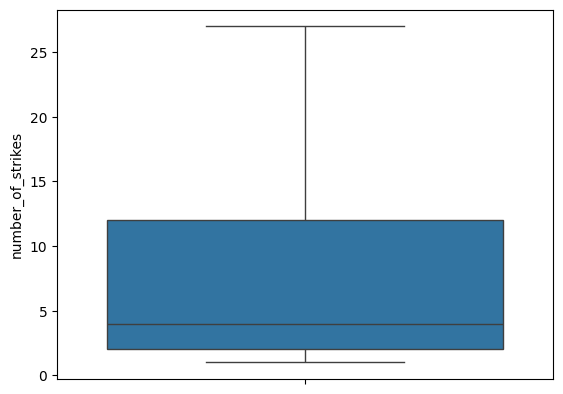

In [23]:
sns.boxplot(y = df['number_of_strikes'], showfliers=False)

Much better! The interquartile range is approximately 2-12 strikes. But we know from the previous boxplot that there are many outlier days that have hundreds or even thousands of strikes. This exercise just helped us make sure that most of the dates in our data had plausible values for number of strikes. 

### Validate `latitude` and `longitude` columns


Finally, we'll create a scatterplot of all the geographical coordinates that had lightning strikes in 2018. We'll plot the points on a map to make sure the points in the data are relevant and not in unexpected locations. Because this can be a computationally intensive process, we'll prevent redundant computation by dropping rows that have the same values in their `latitude` and `longitude` columns. We can do this because the purpose here is to examine locations that had lightning strikes, but it doesn't matter how many strikes they had or when.

In [24]:
# Create new df only of unique latitude and longitude combinations
df_points = df[['latitude', 'longitude']].drop_duplicates() 
df_points.head()

,latitude,longitude
0,27.0,-75.0
1,29.0,-78.4
2,27.0,-73.9
3,27.0,-73.8
4,28.0,-79.0


**Note:** The following cell's output is viewable in two ways: You can re-run this cell, or manually convert the notebook to "Trusted." 

In [25]:
p = px.scatter_geo(df_points, lat='latitude', lon='longitude')

# Set renderer to display in the browser
p.show(renderer="browser")

The plot indicates that the lightning strikes occurred primarily in the United States, but there were also many strikes in southern Canada, Mexico, and the Caribbean. We can click and move the map, and also zoom in for better resolution of the strike points.